# Introduction to HydroGenerate


The HydroGenerate (HG) package was created to assist in the process of evaluating hydropower potential from different types of hydropower generation technologies / facilities. HG is an open-source python library that has the capability of estimating hydropower generation for diversion and hydrokinetic projects.

This document shows a quick workflow for working with HG. All the functionality of HG is encapsulated into a single function (calculate_hp_potential) to facilitate HG utilization by users with limited programming experience. All the base code used in each function is available for reuse and modification. Contributions are welcomed, particularly the addition of new methods, expanding the current functionality, or fixing existing issues with HG. 


In [1]:
%load_ext autoreload
%autoreload 2
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
urllib3.disable_warnings()

# Local imports
from HydroGenerate.utils.api_call import *
from HydroGenerate.hydropower_potential import *
# from hat.utils.PyGeoTools.geolocation import *

# 1. Basic Calculation:

This section presents the workflow for basic hydropower calculations. Basic calculations compute power, head, or flow, given any combination of two parameters. Basic calculations are included for users who do not have data about their system, and it is intended to provide a general idea on existing resources. 

In [2]:
# 1.1) Calculate power from a given head and flow

flow = 8000 # given flow, in cfs
head = 20 # head, in ft
power = None

hp = calculate_hp_potential(flow= flow, head= head, rated_power= power, system_efficiency= 0.7)

print("Hydropower potential is {} kW".format(round(hp.rated_power, 0)))

Hydropower potential is 9483.0 kW


In [3]:
# 1.2) Calculate head from a given head and flow

flow = 8000 # given flow, in cfs
head = None # head, in ft
power = 11515

hp = calculate_hp_potential(flow= flow, head= head, rated_power= power)
print("The head required to produce {} kW with a flow of {} cfs is {} ft".format(hp.rated_power, hp.flow, round(hp.head,1)))

The head required to produce 11515 kW with a flow of 8000.0 cfs is 20.0 ft


In [4]:
# 1.3) Calculate flow from a given head and power

flow = None # given flow, in cfs
head = 20 # head, in ft
power = 11515

hp = calculate_hp_potential(flow= flow, head= head, rated_power= power)
print("The flow required to produce {} kW with a head of {} ft is {} cfs".format(hp.rated_power, hp.head, round(hp.flow, 0)))

The flow required to produce 11515 kW with a head of 20.0 ft is 8000.0 cfs


# 2. Diversion

A diversion, sometimes called a “run-of-river” facility, channels a portion of a river through a canal and/or a penstock to utilize the natural decline of the river bed elevation to produce energy. A penstock is a closed conduit that channels the flow of water to turbines with water flow regulated by gates, valves, and turbines. A diversion may not require the use of a dam. Check [DOE - Types of Hydropower Plant](https://www.energy.gov/eere/water/types-hydropower-plants#:~:text=There%20are%20three%20types%20of,renewable%20energy%20to%20the%20grid.) for additional information. 

In diversion projects, HydroGenerate focuses on calculating hydropower under different configurations.

In [5]:
# 2.1) Head, power, and length of penstock are known. Flow is a single value.
# In this scenario HydroGenerate will select a turbine, compute efficiency for the given flow
# and values within 0.6 to 1.2 the given flow, penstock diameter (assuming steel if no material is given),
# head loss for all flows, rater power,
# power a given range of flow, 

flow = 5000 # cfs
head = 330 # ft
power = None
penstock_length = 400 # ft
hp_type = 'Diversion'

hp = calculate_hp_potential(flow= flow, rated_power= power, head= head,
                            penstock_headloss_calculation= True,
                            # penstock_headloss_method= 'Hazen-Williams',
                            units= 'US',
                            hydropower_type= hp_type, penstock_length= penstock_length,
                            # penstock_diameter= 15,
                            max_headloss_allowed= 10)

# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Turbine type:', hp.turbine_type)
print('Rated Power (MW):', round(hp.rated_power/1000, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Penstock length (ft):', hp.penstock_length)
print('Penstock diameter (ft):', round(hp.penstock_diameter,2))
print('Runner diameter (ft):', round(hp.runner_diameter,2))

print('\nFlow range evaluated (cfs):', np.round(hp.flow, 1))
print('Turbine Efficiency for the given flow range:', np.round(hp.turbine_efficiency, 3))
print('Power (Kw) for the given flow range:', np.round(hp.power,1))


Design flow (cfs): 5000.0
Turbine type: Francis
Rated Power (MW): 116.74
Net head (ft): 298.06
Generator Efficiency: 0.98
Head Loss method: Darcy-Weisbach
Penstock length (ft): 400.0
Penstock diameter (ft): 11.84
Runner diameter (ft): 14.0

Flow range evaluated (cfs): [2500.  2647.1 2794.1 2941.2 3088.2 3235.3 3382.4 3529.4 3676.5 3823.5
 3970.6 4117.6 4264.7 4411.8 4558.8 4705.9 4852.9 5000. ]
Turbine Efficiency for the given flow range: [0.867 0.887 0.902 0.915 0.925 0.932 0.938 0.941 0.943 0.944 0.944 0.944
 0.944 0.944 0.943 0.943 0.943 0.943]
Power (Kw) for the given flow range: [ 57943.8  62522.7  66959.4  71235.5  75338.2  79260.6  83001.7  86566.9
  89968.8  93227.9  96375.4  99438.2 102444.2 105393.8 108284.9 111115.8
 113884.6 116589.4]


In [6]:
# 2.2) Exploring additional options:
#  Using Hazen-Williams for head loss calculation
flow = 8000 # cfs
head = 20 # ft
power = None
penstock_length = 50 # ft
hp_type = 'Diversion'
headloss_method= "Hazen-Williams"

hp = calculate_hp_potential(flow= flow, rated_power= power, head= head,
                            penstock_headloss_calculation= True,
                           hydropower_type= hp_type, penstock_length= penstock_length,
                           penstock_headloss_method= headloss_method)



# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Head_loss at design flow (ft):', round(hp.penstock_design_headloss, 2))
print('Turbine type:', hp.turbine_type)
print('Rated Power (Kw):', round(hp.rated_power, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Penstock length (ft):', hp.penstock_length)
print('Penstock diameter (ft):', round(hp.penstock_diameter, 2))
print('Runner diameter (ft):', round(hp.runner_diameter, 2))

print('\nFlow range evaluated (cfs):', np.round(hp.flow, 1))
print('Turbine Efficiency for the given flow range:', np.round(hp.turbine_efficiency ,3))
print('Power (kW) for the given flow range:', np.round(hp.power, 1))

Design flow (cfs): 8000.0
Head_loss at design flow (ft): 2.0
Turbine type: Kaplan
Rated Power (Kw): 10885.57
Net head (ft): 18.0
Generator Efficiency: 0.98
Head Loss method: Hazen-Williams
Penstock length (ft): 50.0
Penstock diameter (ft): 12.24
Runner diameter (ft): 17.49

Flow range evaluated (cfs): [4000.  4235.3 4470.6 4705.9 4941.2 5176.5 5411.8 5647.1 5882.4 6117.6
 6352.9 6588.2 6823.5 7058.8 7294.1 7529.4 7764.7 8000. ]
Turbine Efficiency for the given flow range: [0.907 0.909 0.91  0.911 0.911 0.911 0.911 0.911 0.911 0.911 0.911 0.911
 0.911 0.911 0.911 0.91  0.909 0.907]
Power (kW) for the given flow range: [ 5851.8  6192.   6522.7  6846.   7163.7  7476.6  7785.2  8089.8  8390.2
  8686.4  8978.2  9265.4  9547.8  9824.7 10094.9 10356.2 10604.5 10833.3]


In [7]:
# 2.3) Exploring additional options:
# Using Hazen-Williams for head loss calculation and 
# a concrete penstock

# 1.1) Exploring additional options:
#  Selecting a diffrent material for the penstock
flow = 8000 # cfs
head = 20 # ft
power = None
penstock_length = 50 # ft
hp_type = 'Diversion'
headloss_method= "Hazen-Williams"
penstock_material = 'Concrete'

hp = calculate_hp_potential(flow= flow, rated_power= power, head= head,
                           hydropower_type= hp_type, penstock_length= penstock_length,
                           penstock_headloss_calculation= True,
                           penstock_headloss_method= headloss_method, penstock_material= penstock_material)

# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Head_loss at design flow (ft):', round(hp.penstock_design_headloss, 2))
print('Turbine type:', hp.turbine_type)
print('Rated Power (Kw):', round(hp.rated_power, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Penstock length (ft):', hp.penstock_length)
print('Penstock diameter (ft):', round(hp.penstock_diameter, 2))
print('Runner diameter (ft):', round(hp.runner_diameter, 2))

print('\nFlow range evaluated (cfs):', np.round(hp.flow, 1))
print('Turbine Efficiency for the given flow range:', np.round(hp.turbine_efficiency ,3))
print('Power (kW) for the given flow range:', np.round(hp.power, 1))

Design flow (cfs): 8000.0
Head_loss at design flow (ft): 2.0
Turbine type: Kaplan
Rated Power (Kw): 10885.57
Net head (ft): 18.0
Generator Efficiency: 0.98
Head Loss method: Hazen-Williams
Penstock length (ft): 50.0
Penstock diameter (ft): 12.76
Runner diameter (ft): 17.49

Flow range evaluated (cfs): [4000.  4235.3 4470.6 4705.9 4941.2 5176.5 5411.8 5647.1 5882.4 6117.6
 6352.9 6588.2 6823.5 7058.8 7294.1 7529.4 7764.7 8000. ]
Turbine Efficiency for the given flow range: [0.907 0.909 0.91  0.911 0.911 0.911 0.911 0.911 0.911 0.911 0.911 0.911
 0.911 0.911 0.911 0.91  0.909 0.907]
Power (kW) for the given flow range: [ 5851.8  6192.   6522.7  6846.   7163.7  7476.6  7785.2  8089.8  8390.2
  8686.4  8978.2  9265.4  9547.8  9824.7 10094.9 10356.2 10604.5 10833.3]


In [8]:
# 2.4) Exploring additional options:
#  Using Hazen-Williams for head loss calculation and
# using a diffrent C value
# Note: editing hydraulic_processing.py allows adding materials that can be called by name.

flow = 8000 # cfs
head = 20 # ft
power = None
penstock_length = 50 # ft
hp_type = 'Diversion'
headloss_method= "Hazen-Williams"
C = 100 # Hazen_williamns C

hp = calculate_hp_potential(flow= flow, rated_power= power, head= head,
                           penstock_headloss_calculation= True,
                           hydropower_type= hp_type, penstock_length= penstock_length,
                           penstock_headloss_method= headloss_method, penstock_frictionfactor= C)

# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Head_loss at design flow (ft):', round(hp.penstock_design_headloss, 2))
print('Turbine type:', hp.turbine_type)
print('Rated Power (Kw):', round(hp.rated_power, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Penstock length (ft):', hp.penstock_length)
print('Penstock diameter (ft):', round(hp.penstock_diameter, 2))
print('Runner diameter (ft):', round(hp.runner_diameter, 2))

print('\nFlow range evaluated (cfs):', np.round(hp.flow, 1))
print('Turbine Efficiency for the given flow range:', np.round(hp.turbine_efficiency ,3))
print('Power (kW) for the given flow range:', np.round(hp.power, 1))

Design flow (cfs): 8000.0
Head_loss at design flow (ft): 2.0
Turbine type: Kaplan
Rated Power (Kw): 10885.57
Net head (ft): 18.0
Generator Efficiency: 0.98
Head Loss method: Hazen-Williams
Penstock length (ft): 50.0
Penstock diameter (ft): 14.1
Runner diameter (ft): 17.49

Flow range evaluated (cfs): [4000.  4235.3 4470.6 4705.9 4941.2 5176.5 5411.8 5647.1 5882.4 6117.6
 6352.9 6588.2 6823.5 7058.8 7294.1 7529.4 7764.7 8000. ]
Turbine Efficiency for the given flow range: [0.907 0.909 0.91  0.911 0.911 0.911 0.911 0.911 0.911 0.911 0.911 0.911
 0.911 0.911 0.911 0.91  0.909 0.907]
Power (kW) for the given flow range: [ 5851.8  6192.   6522.7  6846.   7163.7  7476.6  7785.2  8089.8  8390.2
  8686.4  8978.2  9265.4  9547.8  9824.7 10094.9 10356.2 10604.5 10833.3]


In [2]:
# 2.5) Head, power, and length of penstock are known. Multiple values of flow are available, the design flow is not known.
# In this scenario HydroGenerate will select a turbine, compute efficiency for the given flow values,
# design flow based on a percent of exceedance, penstock diameter (assuming steel if no material is given),
# head loss for all flows, rater power,
# power a given range of flow, 

flow = pd.read_csv('data_test.csv')['discharge_cfs'].to_numpy() # cfs
head = 20 # ft
power = None
penstock_length = 50 # ft
hp_type = 'Diversion'
pctime_runfull= 20 # percent of time the turbine is running full - default is 80%

# Note: decreasing the percent of time the turbine will run full will result in a 
# larger system (rated power and cost)

hp = calculate_hp_potential(flow= flow, rated_power= power, head= head,
                           penstock_headloss_calculation= True,
                           hydropower_type= hp_type, penstock_length= penstock_length,
                           pctime_runfull= pctime_runfull)

# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Head_loss at design flow (ft):', round(hp.penstock_design_headloss, 2))
print('Turbine type:', hp.turbine_type)
print('Rated Power (Kw):', round(hp.rated_power, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Penstock length (ft):', hp.penstock_length)
print('Penstock diameter (ft):', round(hp.penstock_diameter, 2))
print('Runner diameter (ft):', round(hp.runner_diameter, 2))

print('\nFlow range evaluated (cfs):', np.round(hp.flow, 1))
print('Turbine Efficiency for the given flow range:', np.round(hp.turbine_efficiency ,3))
print('Power (kW) for the given flow range:', np.round(hp.power, 1))

Design flow (cfs): 10800.0
Head_loss at design flow (ft): 1.88
Turbine type: Kaplan
Rated Power (Kw): 14828.83
Net head (ft): 18.12
Generator Efficiency: 0.98
Head Loss method: Darcy-Weisbach
Penstock length (ft): 50.0
Penstock diameter (ft): 18.73
Runner diameter (ft): 20.16

Flow range evaluated (cfs): [3260. 3270. 3250. ... 3170. 3100. 3150.]
Turbine Efficiency for the given flow range: [0.768 0.77  0.766 ... 0.751 0.736 0.747]
Power (kW) for the given flow range: [4118.3 4140.3 4096.2 ... 3917.7 3759.3 3872.7]


#### Flow as Pandas dataframe with a datetime index - Additional functionality.

In [3]:
# 2.6) Using flow as a pandas dataframe and adding annual energy calculation

# Note: When using a pandas dataframe as flow data, please set the datetime index before 
# using HydroGenerate.  (https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)

flow = pd.read_csv('data_test.csv') # pandas data frame
flow['dateTime'] = pd.to_datetime(flow['dateTime']) # preprocessing convert to datetime
flow = flow.set_index('dateTime') # set datetime index # flolw is in cfs

head = 20 # ft
power = None
penstock_length = 50 # ft
hp_type = 'Diversion' 

hp = calculate_hp_potential(flow= flow, rated_power= power, head= head,
                            pctime_runfull = 30,
                            penstock_headloss_calculation= True,
                            design_flow= None,
                            electricity_sell_price = 0.05,
                            resource_category= 'CanalConduit',
                            hydropower_type= hp_type, penstock_length= penstock_length,
                            flow_column= 'discharge_cfs', annual_caclulation= True)

pd.set_option('display.max_columns', 10) # 
pd.set_option('display.width', 1000)

# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Head_loss at design flow (ft):', round(hp.penstock_design_headloss, 2))
print('Turbine type:', hp.turbine_type)
print('Rated Power (Kw):', round(hp.rated_power, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Penstock length (ft):', hp.penstock_length)
print('Penstock diameter (ft):', round(hp.penstock_diameter,2))
print('Runner diameter (ft):', round(hp.runner_diameter,2))

print('\nResource Category:', hp.resource_category)
print('Initial Capital Cost (M$):', np.round(hp.icc,1))
print('Annual Operation and Maintennance (M$):', np.round(hp.annual_om,1))

print('\nPandas dataframe output: \n', hp.dataframe_output)
print('Annual output: \n', hp.annual_dataframe_output)

Design flow (cfs): 9620.0
Head_loss at design flow (ft): 1.96
Turbine type: Kaplan
Rated Power (Kw): 13142.39
Net head (ft): 18.04
Generator Efficiency: 0.98
Head Loss method: Darcy-Weisbach
Penstock length (ft): 50.0
Penstock diameter (ft): 17.75
Runner diameter (ft): 19.08

Resource Category: CanalConduit
Initial Capital Cost (M$): 56.1
Annual Operation and Maintennance (M$): 0.9

Pandas dataframe output: 
                            discharge_cfs   site_id     power_kW  turbine_flow_cfs  efficiency   energy_kWh
dateTime                                                                                                  
2010-01-01 08:00:00+00:00         3260.0  11370500  4417.413411            3260.0    0.825791          NaN
2010-01-01 08:15:00+00:00         3270.0  11370500  4437.662487            3270.0    0.827097  1109.415622
2010-01-01 08:30:00+00:00         3250.0  11370500  4397.114770            3250.0    0.824469  1099.278692
2010-01-01 08:45:00+00:00         3270.0  11370500  

In [23]:
from dataretrieval import nwis

In [24]:
# Set the parameters needed to retrieve data
siteNumber = "10109000" # LOGAN RIVER ABOVE STATE DAM, NEAR LOGAN, UT
parameterCode = "00060" # Discharge
startDate = "2010-01-01"
endDate = "2020-12-31"

# Retrieve the data
dailyStreamflow = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 

In [32]:
flow = pd.DataFrame(dailyStreamflow[0])
flow.head()

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
2010-01-01 00:00:00+00:00,108.0,A,10109000
2010-01-02 00:00:00+00:00,107.0,A,10109000
2010-01-03 00:00:00+00:00,106.0,A,10109000
2010-01-04 00:00:00+00:00,102.0,A,10109000
2010-01-05 00:00:00+00:00,105.0,A,10109000


In [60]:
flow_percentiles = np.percentile(flow['00060_Mean'], q = np.linspace(1, 100, 100))        # percentiles to compute, 1:100
pc_e = np.linspace(100, 1, 100)     # sequence from 100 to 1.

In [61]:
x = pc_e
y = flow_percentiles

In [66]:
x

array([100.,  99.,  98.,  97.,  96.,  95.,  94.,  93.,  92.,  91.,  90.,
        89.,  88.,  87.,  86.,  85.,  84.,  83.,  82.,  81.,  80.,  79.,
        78.,  77.,  76.,  75.,  74.,  73.,  72.,  71.,  70.,  69.,  68.,
        67.,  66.,  65.,  64.,  63.,  62.,  61.,  60.,  59.,  58.,  57.,
        56.,  55.,  54.,  53.,  52.,  51.,  50.,  49.,  48.,  47.,  46.,
        45.,  44.,  43.,  42.,  41.,  40.,  39.,  38.,  37.,  36.,  35.,
        34.,  33.,  32.,  31.,  30.,  29.,  28.,  27.,  26.,  25.,  24.,
        23.,  22.,  21.,  20.,  19.,  18.,  17.,  16.,  15.,  14.,  13.,
        12.,  11.,  10.,   9.,   8.,   7.,   6.,   5.,   4.,   3.,   2.,
         1.])

In [68]:
x_s = np.sort(x)
x_s

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [71]:
from scipy.interpolate import make_interp_spline, BSpline

# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(x.min(), x.max(), 1000) 



spl = make_interp_spline(x_s, y, k=3)  # type: BSpline

ynew = spl(xnew)


x_plot = np.sort(xnew)[::-1]

# plt.plot(x_plot, ynew)



In [81]:
plt.rcParams.update({'font.size': 14})

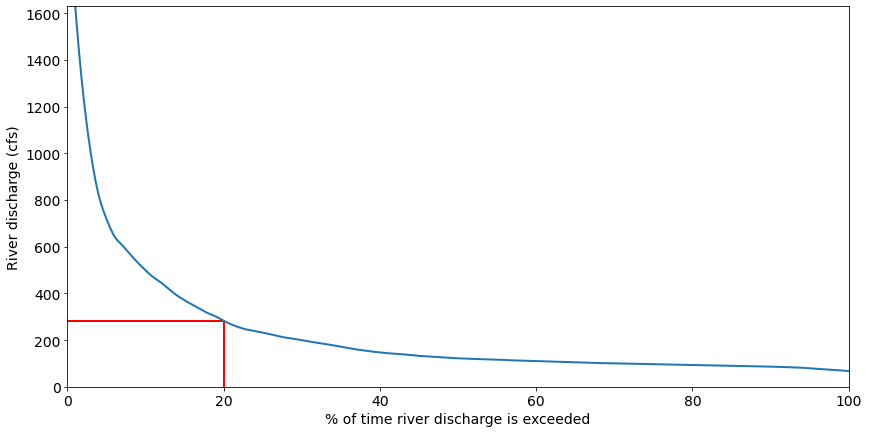

In [92]:
# plot
plt.rcParams['figure.figsize'] = [14, 7]

fig, ax = plt.subplots()
x = pc_e
y = flow_percentiles / 1000

ax.margins(x=0)
ax.margins(y=0)

ax.plot(x_plot, ynew, linewidth=2.0)
ax.set_xlabel('% of time river discharge is exceeded')
ax.set_ylabel('River discharge (cfs)')

plt.hlines(y= 282, xmin=0, xmax=20, colors='red', linestyles='-', lw=2)
plt.vlines(x= 20, ymin=0, ymax=282, colors='red', linestyles='-', lw=2)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))


plt.savefig('designflow.png', bbox_inches='tight')

In [ ]:
flow_percentiles = np.percentile(flow, q = np.linspace(1, 100, 100))        # percentiles to compute, 1:100
flowduration_curve = {'Flow': flow_percentiles, 'Percent_Exceedance':pc_e}      # Flow duration curve
design_flow = float(flowduration_curve['Flow'][flowduration_curve['Percent_Exceedance'] == pe])     # flow for the selected percent of excedante
turbine.flowduration_curve = pd.DataFrame(data = flowduration_curve)

/var/folders/4q/x03r7skn1mq4_psy5xsslnrwkzm0g0/T/ipykernel_9017/1808466405.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(df['power_kW'],'b-',label="Power", color=color_plot2)


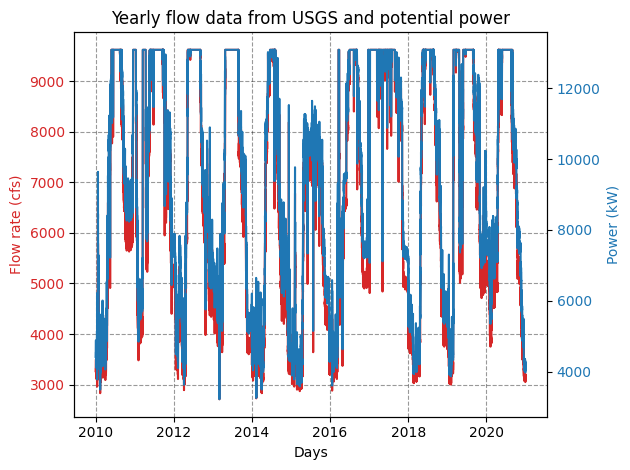

In [11]:
# Plot results
# Columns:  discharge_cfs   site_id     power_kW  efficiency   energy_kWh

df = hp.dataframe_output.copy()
fig, ax1 = plt.subplots()


color_plot = 'tab:red'
ax1.set_xlabel('Days')
ax1.set_ylabel('Flow rate (cfs)', color=color_plot)
ax1.plot(df['turbine_flow_cfs'], label="Flow rate", color=color_plot)
ax1.tick_params(axis='y', labelcolor=color_plot)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color_plot2 = 'tab:blue'
ax2.set_ylabel('Power (kW)', color=color_plot2)  # we already handled the x-label with ax1
ax2.plot(df['power_kW'],'b-',label="Power", color=color_plot2)
ax2.tick_params(axis='y', labelcolor=color_plot2)
ax1.grid(True, axis='both', color='k',linestyle='--',alpha=0.4)
plt.title("Yearly flow data from USGS and potential power")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig(os.path.join('..','fig','usgs_twin_falls_flow_power.jpg'))
plt.show()

In [12]:
# # 2.7) Use streamflow data from a USGS stream gauge. 
# # HydroGenerate has functions to query data from USGS streamgauges

# query = {}
# # Example querying data from 'USGS 05487520 Des Moines River near Swan, IA'
# query['id'] = '05487520'
# query['start_date'] = '2010-01-01'
# query['end_date'] = '2020-12-30'

# # Call the get_data method. Note that the id_type has been set to 'sites'
# flow_info = get_data(query, id_type='sites', path='../data_test_1.csv')

# # Clean the data and make the date time column the index 
# flow = clean_data(flow_info[0], column_change={'Streamflow, ft&#179;/s':'discharge_cfs'}, keep_nan=True, timestamp_col='dateTime', no_data=-999999)
# flow.head()

In [13]:
# 2.7) Use streamflow data from a USGS stream gauge - Cont.

# The flow data for this example was created in the previous step. # cfs
head = 104 # ft
power = None
penstock_length = 20 # ft
hp_type = 'Diversion' 

hp = calculate_hp_potential(flow= flow, rated_power= power, head= head,
                            penstock_headloss_calculation= True,
                           hydropower_type= hp_type, penstock_length= penstock_length,
                           flow_column= 'discharge_cfs', annual_caclulation= True)

# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Head_loss at design flow (ft):', round(hp.penstock_design_headloss, 2))
print('Turbine type:', hp.turbine_type)
print('Rated Power (Kw):', round(hp.rated_power, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Penstock length (ft):', hp.penstock_length)
print('Penstock diameter (ft):', round(hp.penstock_diameter,2))
print('Runner diameter (ft):', round(hp.runner_diameter,2))

print('\nPandas dataframe output: \n', hp.dataframe_output)
print('Annual output: \n', hp.annual_dataframe_output)

Design flow (cfs): 9620.0
Head_loss at design flow (ft): 9.12
Turbine type: Kaplan
Rated Power (Kw): 71068.93
Net head (ft): 94.88
Generator Efficiency: 0.98
Head Loss method: Darcy-Weisbach
Penstock length (ft): 20.0
Penstock diameter (ft): 10.86
Runner diameter (ft): 19.08

Pandas dataframe output: 
                            discharge_cfs   site_id      power_kW  turbine_flow_cfs  efficiency   energy_kWh
dateTime                                                                                                   
2010-01-01 08:00:00+00:00         3260.0  11370500  23652.092209            3260.0    0.849302          NaN
2010-01-01 08:15:00+00:00         3270.0  11370500  23760.683673            3270.0    0.850645  5940.170918
2010-01-01 08:30:00+00:00         3250.0  11370500  23543.237476            3250.0    0.847941  5885.809369
2010-01-01 08:45:00+00:00         3270.0  11370500  23760.683673            3270.0    0.850645  5940.170918
2010-01-01 09:00:00+00:00         3270.0  113705

In [14]:
# Full list of parameters included in HydroGenerate calculation
# dir(hp)

# 3. Economic calculation

In [15]:
# 3.1) Cost and Annual O&M a0s part of a project. Resource_category =  'Non-PoweredDam'
flow = 8000 # cfs
head = 100 # ft
power = None

hp = calculate_hp_potential(flow= flow, rated_power= power, head= head,
                            penstock_headloss_calculation= True,
                           hydropower_type= 'Diversion', penstock_length = 50,
                           resource_category= 'NewStream-reach')

# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Head_loss at design flow (ft):', round(hp.penstock_design_headloss, 2))
print('Turbine type:', hp.turbine_type)
print('Rated Power (Kw):', round(hp.rated_power, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Penstock length (ft):', hp.penstock_length)
print('Penstock diameter (ft):', round(hp.penstock_diameter,2))
print('Runner diameter (ft):', round(hp.runner_diameter,2))

print('\nResource Category:', hp.resource_category)
print('Initial Capital Cost (M$):', np.round(hp.icc,1))
print('Annual Operation and Maintennance (M$):', np.round(hp.annual_om,1))

Design flow (cfs): 8000.0
Head_loss at design flow (ft): 8.92
Turbine type: Kaplan
Rated Power (Kw): 56691.5
Net head (ft): 91.08
Generator Efficiency: 0.98
Head Loss method: Darcy-Weisbach
Penstock length (ft): 50.0
Penstock diameter (ft): 12.17
Runner diameter (ft): 17.49

Resource Category: NewStream-reach
Initial Capital Cost (M$): 281.1
Annual Operation and Maintennance (M$): 2.0


In [16]:
# 3.2) resource_category: 'Non-PoweredDam'
head = 104 # ft
power = 20500 # kW

hp = calculate_hp_potential(rated_power= power, head= head,
                           hydropower_type= None, resource_category= 'Non-PoweredDam')

print('\nResource Category:', hp.resource_category)
print('Initial Capital Cost (M$):', np.round(hp.icc,1))
print('Annual Operation and Maintennance (M$):', np.round(hp.annual_om,1))


Resource Category: Non-PoweredDam
Initial Capital Cost (M$): 71.9
Annual Operation and Maintennance (M$): 1.2


In [17]:
# 3.3 Rewinding a generator. resource_caterogy= 'GeneratorRewind')
head = 104 # ft
power = 20500 # kWred dev

hp = calculate_hp_potential(rated_power= power, head= head,
                           hydropower_type= None, resource_category= 'GeneratorRewind')

print('\nResource Category:', hp.resource_category)
print('Initial Capital Cost (M$):', np.round(hp.icc,1))
print('Annual Operation and Maintennance (M$):', np.round(hp.annual_om,1))


Resource Category: GeneratorRewind
Initial Capital Cost (M$): 3.0
Annual Operation and Maintennance (M$): 1.2


In [18]:
# 3.4 Adding a new unit. resource_caterogy= 'UnitAddition')
head = 104 # ft
power = 20500 # kW

hp = calculate_hp_potential(rated_power= power, head= head,
                           hydropower_type= None, resource_category= 'UnitAddition')

print('\nResource Category:', hp.resource_category)
print('Initial Capital Cost (M$):', np.round(hp.icc,1))
print('Annual Operation and Maintennance (M$):', np.round(hp.annual_om,1))


Resource Category: UnitAddition
Initial Capital Cost (M$): 39.0
Annual Operation and Maintennance (M$): 1.0


In [19]:
# 3.5 Annual energy generated and revenue
flow = 8000 # cfs
head = 20 # ft

hp = calculate_hp_potential(flow= flow, head= head, penstock_length= 50, 
                           hydropower_type= 'Diversion', # head_loss_calculation= False,
                           annual_caclulation= True, capacity_factor= 0.5)


# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Turbine type:', hp.turbine_type)
print('Rated Power (MW):', round(hp.rated_power / 1000, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Runner diameter (ft):', round(hp.runner_diameter,2))


print('\nAnnual energy generated (MwH):', round(hp.annual_energy_generated / 1000, 0))
print('Number of days a year the plant operates:', hp.n_operation_days)
print('Annual revenue (M$):', round(hp.annual_revenue, 1))


Design flow (cfs): 8000.0
Turbine type: Kaplan
Rated Power (MW): 12.1
Net head (ft): 20.0
Generator Efficiency: 0.98
Head Loss method: None
Runner diameter (ft): 17.49

Annual energy generated (MwH): 39695.0
Number of days a year the plant operates: 182.5
Annual revenue (M$): 0.4


# 4. Hydrokinetics

In [20]:
# 4.1 Average velocity is known. hk_blade_type= 'ConventionalRotor'

V = 2  # average cross-section velocity m/s

hp = calculate_hp_potential(channel_average_velocity = V,
                           hydropower_type = 'Hydrokinetic', units = 'SI',
                           hk_blade_type= 'ConventionalRotor')

print('Rated Power (kW):', round(hp.rated_power, 2))

Rated Power (kW): 1.85


In [21]:
# 4.2 Average velocity is known. US units. hk_blade_type= 'H-DarrieusRotor'
V = 6.6 # average cross-section velovicty ft/s

hp = calculate_hp_potential(channel_average_velocity = V,
                           hydropower_type = 'Hydrokinetic', units = 'US',
                           hk_blade_type= 'H-DarrieusRotor')

print('Rated Power (kW):', round(hp.rated_power, 2))

Rated Power (kW): 2.4


In [22]:
# 4.3 Average velocity is known. hk_blade_type= 'H-DarrieusRotor'

V = 2 # average cross-section velovicty m/s

hp = calculate_hp_potential(channel_average_velocity = V,
                           hydropower_type = 'Hydrokinetic', units = 'SI',
                           hk_blade_type= 'H-DarrieusRotor')

print('Rated Power (kW):', round(hp.rated_power, 2))

Rated Power (kW): 2.36


In [23]:
# 4.3 Average velocity is known. hk_blade_type= 'H-DarrieusRotor'. Blade dimensions are known.

V = 4 # average cross-section velovicty m/s

hp = calculate_hp_potential(channel_average_velocity = V,
                           hydropower_type = 'Hydrokinetic', units = 'SI',
                           hk_blade_type= 'H-DarrieusRotor',
                           hk_blade_diameter= 1.6,
                           hk_blade_heigth = 2)

# hk_blade_diameter= None, 
#                            hk_blade_heigth= None, 
#                            hk_blade_type= None, 
#                            hk_swept_area = None):

print('Rated Power (kW):', round(hp.rated_power, 2))

Rated Power (kW): 60.42


# 5. Multi-unit operation

In [24]:
flow = pd.read_csv('data_test.csv')
head = 20 # ft
power = None
penstock_length = 50 # ft
hp_type = 'Diversion'
PCRF = 30

flow['dateTime'] = pd.to_datetime(flow['dateTime']) # preprocessing convert to datetime
flow = flow.set_index('dateTime') # set datetime index # flolw is in cfs

flow.head()


,discharge_cfs,site_id
dateTime,,
2010-01-01 08:00:00+00:00,3260.0,11370500
2010-01-01 08:15:00+00:00,3270.0,11370500
2010-01-01 08:30:00+00:00,3250.0,11370500
2010-01-01 08:45:00+00:00,3270.0,11370500
2010-01-01 09:00:00+00:00,3270.0,11370500


In [25]:
hp = calculate_hp_potential(flow= flow, flow_column='discharge_cfs', rated_power= power, head= head, penstock_headloss_calculation= True,
                           hydropower_type= hp_type, penstock_length= penstock_length,
                           pctime_runfull=PCRF, annual_caclulation= True)

print('Annual output: \n', hp.annual_dataframe_output)


Annual output: 
           annual_turbinedvolume_ft3  mean_annual_effienciency  total_annual_energy_KWh  revenue_M$  capacity_factor
dateTime                                                                                                           
2010                   6.605955e+06                  0.890552             8.136850e+07    0.903190         0.706769
2011                   7.696602e+06                  0.907936             9.468480e+07    1.051001         0.822435
2012                   6.511915e+06                  0.899117             8.102678e+07    0.899397         0.703801
2013                   6.685759e+06                  0.901904             8.281361e+07    0.919231         0.719322
2014                   5.637207e+06                  0.883477             6.988931e+07    0.775771         0.607061
2015                   5.444864e+06                  0.882418             6.832364e+07    0.758392         0.593461
2016                   6.545640e+06                  0.

In [26]:
print('Rated Power from one turbine (Kw):', round(hp.rated_power, 2))
#print('Total annual energy generated from one turbine (kWhr)', hp.annual_energy_generation)
print('Turbine1 type:', hp.turbine_type)

Rated Power from one turbine (Kw): 13142.39
Turbine1 type: Kaplan


In [27]:
#user should enter upper and lower limits of the interval
f = PCRF
f2 = PCRF-20
hp1 = calculate_hp_potential(flow= flow, flow_column='discharge_cfs', rated_power= power, head= head, penstock_headloss_calculation= True,
                           hydropower_type= hp_type, penstock_length= penstock_length, annual_caclulation= True,
                           pctime_runfull=f)
 


In [30]:
#Q2 = flow.discharge_cfs - hp1.dataframe_output.turbine_flow_cfs #np.where((flow-Q1)>design_flow2, design_flow2, flow-Q1)

hp1.dataframe_output['Q2'] = flow.discharge_cfs - hp1.dataframe_output.turbine_flow_cfs

In [31]:
hp1.dataframe_output

,discharge_cfs,site_id,power_kW,turbine_flow_cfs,efficiency,energy_kWh,Q2
dateTime,,,,,,,
2010-01-01 08:00:00+00:00,3260.0,11370500,4417.413411,3260.0,0.825791,NaN,-4.547474e-13
2010-01-01 08:15:00+00:00,3270.0,11370500,4437.662487,3270.0,0.827097,1109.415622,0.000000e+00
2010-01-01 08:30:00+00:00,3250.0,11370500,4397.114770,3250.0,0.824469,1099.278692,0.000000e+00
2010-01-01 08:45:00+00:00,3270.0,11370500,4437.662487,3270.0,0.827097,1109.415622,0.000000e+00
2010-01-01 09:00:00+00:00,3270.0,11370500,4437.662487,3270.0,0.827097,1109.415622,0.000000e+00
...,...,...,...,...,...,...,...
2021-01-01 06:45:00+00:00,3100.0,11370500,4086.646847,3100.0,0.802515,1021.661712,0.000000e+00
2021-01-01 07:00:00+00:00,3190.0,11370500,4274.278135,3190.0,0.816173,1068.569534,0.000000e+00
2021-01-01 07:15:00+00:00,3170.0,11370500,4232.933171,3170.0,0.813268,1058.233293,0.000000e+00


In [44]:
 
#increasing pctime_runful will decrease design flow and reduce rated capacity
hp2 = calculate_hp_potential(flow= hp1.dataframe_output, flow_column = 'Q2', rated_power= power, head= head, penstock_headloss_calculation= True,
                           hydropower_type= hp_type, penstock_length= penstock_length, annual_caclulation= True,
                           pctime_runfull=f2)
 


In [45]:
hp2.dataframe_output

,discharge_cfs,site_id,power_kW,turbine_flow_cfs,efficiency,energy_kWh,Q2
dateTime,,,,,,,
2010-01-01 08:00:00+00:00,3260.0,11370500,-0.0,-4.547474e-13,0.0,NaN,-4.547474e-13
2010-01-01 08:15:00+00:00,3270.0,11370500,0.0,0.000000e+00,0.0,0.0,0.000000e+00
2010-01-01 08:30:00+00:00,3250.0,11370500,0.0,0.000000e+00,0.0,0.0,0.000000e+00
2010-01-01 08:45:00+00:00,3270.0,11370500,0.0,0.000000e+00,0.0,0.0,0.000000e+00
2010-01-01 09:00:00+00:00,3270.0,11370500,0.0,0.000000e+00,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...
2021-01-01 06:45:00+00:00,3100.0,11370500,0.0,0.000000e+00,0.0,0.0,0.000000e+00
2021-01-01 07:00:00+00:00,3190.0,11370500,0.0,0.000000e+00,0.0,0.0,0.000000e+00
2021-01-01 07:15:00+00:00,3170.0,11370500,0.0,0.000000e+00,0.0,0.0,0.000000e+00


Rated Power1 (Kw): 13142.39
Rated Power2 (Kw): 4433.71
Rated Power from two turbine (Kw): 17576.11
Total annual energy generated (kWhr) 82280330.92956579
Turbine1 type: Kaplan
Turbine2 type: Kaplan


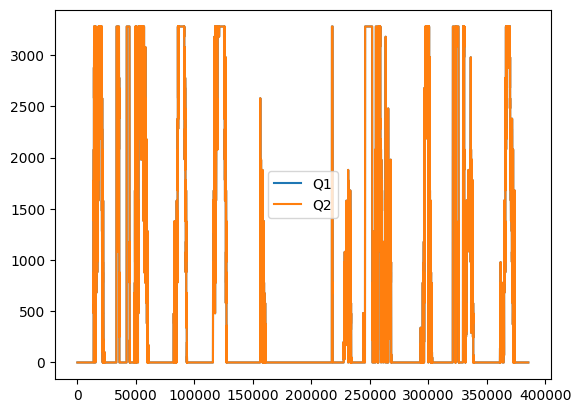

"\npctime_runfull_1= 20 # percent of time the turbine is running full - default is 80%\npe = pctime_runfull_1     # percentage of time a turbine is running full\npc_e = np.linspace(100, 1, 100)     # sequence from 100 to 1.\nflow_percentiles = np.percentile(flow, q = np.linspace(1, 100, 100))        # percentiles to compute, 1:100\nflowduration_curve = {'Flow': flow_percentiles, 'Percent_Exceedance':pc_e}      # Flow duration curve\ndesign_flow1 = float(flowduration_curve['Flow'][flowduration_curve['Percent_Exceedance'] == pe])     # flow for the selected percent of excedante\n \n"

In [41]:
Q1 = hp1.dataframe_output.turbine_flow_cfs.copy()
Q2 = hp2.dataframe_output.turbine_flow_cfs.copy()
 
Q = Q1 + Q2
 
#print(hp.annual_dataframe_output)
#what is the total energy being produced?
print('Rated Power1 (Kw):', round(hp1.rated_power, 2))
print('Rated Power2 (Kw):', round(hp2.rated_power, 2))
P = hp1.rated_power + hp2.rated_power
print('Rated Power from two turbine (Kw):', round(P, 2))
E = hp1.annual_dataframe_output.total_annual_energy_KWh.mean() + hp2.annual_dataframe_output.total_annual_energy_KWh.mean()
print('Total annual energy generated (kWhr)', E)
print('Turbine1 type:', hp1.turbine_type)
print('Turbine2 type:', hp2.turbine_type)
#What parameters can we optimize? --> pctime_runful to maximize the tot energy produced
 
x = np.array(range(385416))
plt.figure(1)
plt.plot(x, Q1, label = "Q1")
plt.plot(x, Q2, label = "Q2")
#plt.plot(x, Q, label = "Q")
plt.legend()
plt.show()
 
 
#some boundary of capacity factor is required
"""
pctime_runfull_1= 20 # percent of time the turbine is running full - default is 80%
pe = pctime_runfull_1     # percentage of time a turbine is running full
pc_e = np.linspace(100, 1, 100)     # sequence from 100 to 1.
flow_percentiles = np.percentile(flow, q = np.linspace(1, 100, 100))        # percentiles to compute, 1:100
flowduration_curve = {'Flow': flow_percentiles, 'Percent_Exceedance':pc_e}      # Flow duration curve
design_flow1 = float(flowduration_curve['Flow'][flowduration_curve['Percent_Exceedance'] == pe])     # flow for the selected percent of excedante
 
"""

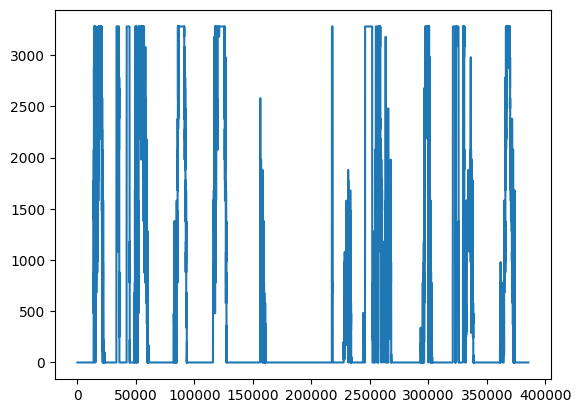

In [38]:
plt.figure(1)
plt.plot(x, Q1, label = "Q1")

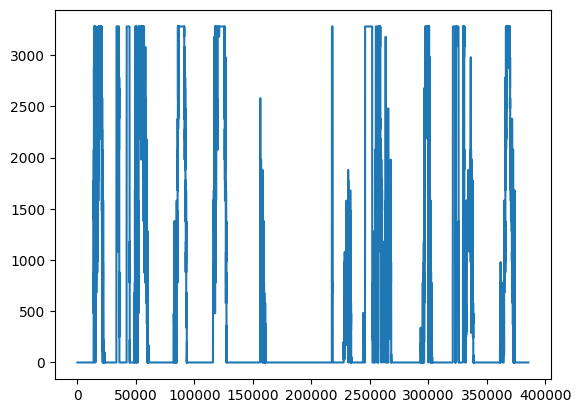

In [39]:
plt.figure(1)
plt.plot(x, Q2, label = "Q2")